# Data Cleaning

## Table of Contents
- [Set Up](#Set_Up)
- [Data Selection](#Data_Selection)
- [Cleaning](#Cleaning)
- [Encodings](#Encodings)
- [Remove Highly Correlated Features](#Remove_Highly_Correlated_Features)

<a id="Set_Up"></a>
## Set_Up

In [1]:
# Imports
# Basics
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None) # For showing all the columns on the graphs

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from utils import OUTCOME_ENCODES, heatmaps_side_by_side

In [2]:
# Define the list of column names for the dataframe
column_names = ['Dataflow','Frequency','Time','Country_Code','Topic',
                'Indicator','Sex','Age','Condition','Violence_Type',
                'Perpetrator','Actuality','Life_Period','Outcome',
                'Response','Help_Reason','Help_Provider',
                'Observation_Value','Measure_Unit','Unit_Multiplier',
                'Observation_Status','Data_Source','Comment'
               ]

# Read raw data from the VAW.csv file
# and assign column names from the column_names list
data_v1 = pd.read_csv('datasets/VAW.csv', 
                      # Specify the first row as the header
                      header=0, 
                      # Assign the column names from column_names list
                      names=column_names)

In [3]:
data_v1.head(10) # First look!

,Dataflow,Frequency,Time,Country_Code,Topic,Indicator,Sex,Age,Condition,Violence_Type,Perpetrator,Actuality,Life_Period,Outcome,Response,Help_Reason,Help_Provider,Observation_Value,Measure_Unit,Unit_Multiplier,Observation_Status,Data_Source,Comment
0,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,CONT_ECON: At least one act of economic abusive,PARTNER: Partner,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,6.2,PERCENT: percent,NaN,NaN,FHSS,NaN
1,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,EMO: Emotional violence,PARTNER: Partner,ALO12M: At least once in the past 12 months,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,9.6,PERCENT: percent,NaN,NaN,FHSS,NaN
2,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,EMO: Emotional violence,PARTNER: Partner,ALOLIFE: At least once in their lifetime,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,26.7,PERCENT: percent,NaN,NaN,FHSS,NaN
3,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,PHYS: Physical violence,PARTNER: Partner,ALO12M: At least once in the past 12 months,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,6.7,PERCENT: percent,NaN,NaN,FHSS,NaN
4,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,PHYS: Physical violence,PARTNER: Partner,ALOLIFE: At least once in their lifetime,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,30.2,PERCENT: percent,NaN,NaN,FHSS,NaN
5,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,PHYSORSEX: Physical and/or sexual violence,PARTNER: Partner,ALO12M: At least once in the past 12 months,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,9.1,PERCENT: percent,NaN,NaN,FHSS,NaN
6,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,PHYSORSEX: Physical and/or sexual violence,PARTNER: Partner,ALOLIFE: At least once in their lifetime,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,33.0,PERCENT: percent,NaN,NaN,FHSS,NaN
7,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,SEX: Sexual violence,PARTNER: Partner,ALO12M: At least once in the past 12 months,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,4.6,PERCENT: percent,NaN,NaN,FHSS,NaN
8,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPART: Ever-partnered,SEX: Sexual violence,PARTNER: Partner,ALOLIFE: At least once in their lifetime,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,13.1,PERCENT: percent,NaN,NaN,FHSS,NaN
9,SPC:DF_VAW(1.0),A: Annual,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,NUMPERRF: Number of persons in relative frequency,F: Female,Y15T64: 15-64,EVPREG: Ever pregnant,_T: Any,_T: Any,_T: Any,PREGNANCY: During pregnancy,_T: Any,_T: Any,_T: Any,_T: Any,8.0,PERCENT: percent,NaN,NaN,FHSS,NaN


<a id="Data_Selection"></a>
## Data_Selection

In this section, a preliminary check is performed to eliminate any completely useless features.<br/>
These features fall into one of the following two categories:
<li> They contain no stored data (empty feature).
<li> They are filled with the same value for every example, so they can't add any more information to the dataset.

In [4]:
# Are there any NaN's?
data_v1.isna().sum()

Dataflow                 0
Frequency                0
Time                     0
Country_Code             0
Topic                    0
Indicator                0
Sex                      0
Age                      0
Condition                0
Violence_Type            0
Perpetrator              0
Actuality                0
Life_Period              0
Outcome                  0
Response                 0
Help_Reason              0
Help_Provider            0
Observation_Value      782
Measure_Unit             0
Unit_Multiplier       2016
Observation_Status    1253
Data_Source              0
Comment               1003
dtype: int64

The "Unit_Multiplier" feature only contains NaN values.

In [5]:
# Loop through each column in the dataframe
for column in data_v1.columns:
    # Print the number of unique values in the column
    print(f'{column}: {len(data_v1[column].unique())}')
    # Print the unique values in the column
    print(data_v1[column].unique())

Dataflow: 1
['SPC:DF_VAW(1.0)']
Frequency: 1
['A: Annual']
Time: 10
[2013 2011 2014 2010 2019 2007 2012 2018 2009 2006]
Country_Code: 13
['CK: Cook Islands' 'FJ: Fiji' 'FM: Micronesia (Federated States of)'
 'KI: Kiribati' 'MH: Marshall Islands' 'NR: Nauru' 'PG: Papua New Guinea'
 'PW: Palau' 'SB: Solomon Islands' 'TO: Tonga' 'TV: Tuvalu' 'VU: Vanuatu'
 'WS: Samoa']
Topic: 18
['VAW_TOPIC_001: Types of violence against women by partner'
 'VAW_TOPIC_002: Partner Physical violence by severity'
 'VAW_TOPIC_003: Act of physical violence by partners'
 'VAW_TOPIC_004: Acts of sexual violence by partners'
 'VAW_TOPIC_005: Acts of emotional  violence by partners'
 'VAW_TOPIC_006: Acts of controlling behaviours by partners'
 'VAW_TOPIC_007: Types of violence against women by others (non-partners)'
 'VAW_TOPIC_008: Non-Partner Physical violence by type of perpetrator'
 'VAW_TOPIC_009: Non-Partner Sexual violence by type of perpetrator'
 'VAW_TOPIC_010: Child sexual abuse prevalence by type of per

In [6]:
# Drop all columns that include only one value (=> no extra informwtion for the models)
columns_to_drop = ['Dataflow',              # all values -> "SPC:DF_VAW(1.0)"
                   'Frequency',             # all values -> "A: Annual"
                   'Indicator',             # all values -> "NUMPERRF: Number of persons in relative frequency"
                   'Sex',                   # all values -> "F: Female"
                   'Measure_Unit',          # all values -> "PERCENT: percent"
                   'Unit_Multiplier',       # all values -> nan
                   'Observation_Status',    # all values -> nan, "O: Missing value"
                  ]

# Drop the columns from the dataframe data_v1
data_v2 = data_v1.drop(columns_to_drop, 
                       # Specify that the columns are being dropped from the dataframe axis
                       axis=1)

In [7]:
data_v2.head()

,Time,Country_Code,Topic,Age,Condition,Violence_Type,Perpetrator,Actuality,Life_Period,Outcome,Response,Help_Reason,Help_Provider,Observation_Value,Data_Source,Comment
0,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,Y15T64: 15-64,EVPART: Ever-partnered,CONT_ECON: At least one act of economic abusive,PARTNER: Partner,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,6.2,FHSS,NaN
1,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,Y15T64: 15-64,EVPART: Ever-partnered,EMO: Emotional violence,PARTNER: Partner,ALO12M: At least once in the past 12 months,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,9.6,FHSS,NaN
2,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,Y15T64: 15-64,EVPART: Ever-partnered,EMO: Emotional violence,PARTNER: Partner,ALOLIFE: At least once in their lifetime,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,26.7,FHSS,NaN
3,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,Y15T64: 15-64,EVPART: Ever-partnered,PHYS: Physical violence,PARTNER: Partner,ALO12M: At least once in the past 12 months,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,6.7,FHSS,NaN
4,2013,CK: Cook Islands,VAW_TOPIC_001: Types of violence against women...,Y15T64: 15-64,EVPART: Ever-partnered,PHYS: Physical violence,PARTNER: Partner,ALOLIFE: At least once in their lifetime,_T: Any,_T: Any,_T: Any,_T: Any,_T: Any,30.2,FHSS,NaN


<a id="Cleaning"></a>
## Cleaning

In the next stage of preprocessing, it is crucial to perform feature cleaning to remove any symbols and standardize the values. Having clean, consistent data is essential for successful data analysis and machine learning modeling. Clean data is easier to work with, reducing the risk of errors and increasing accuracy of results. Removing redundant symbols and characters also reduces the dimensionality of the data, making it more manageable for analysis. Clean data increases the reliability and interpretability of results.<br/>
Additionally, it is important to clean each feature separately, as different features may require different cleaning steps.

#### Feature: "Country_Code"

In [8]:
# Define a cleaning function to extract the first two characters of a string
def only_alpha_2_code(string):
    return string[0:2]

# Apply the cleaning function to the 'Country_Code' column
data_v2['Country_Code'] = data_v2['Country_Code'].apply(only_alpha_2_code)

#### Feature: "Topic"

In [9]:
# Define a cleaning function to extract a formatted string from the 'Topic' column
def only_wav_code(string):
    return 'VAW_'+(string.split(':')[0][-3:])

# Create a dictionary to store information about the topics
topic_info = {}

# Extract and store the information from the 'Topic' column
for value in data_v2['Topic'].unique():
    s = value.split(':')
    topic_info[s[0]] = s[1][1:]

# Apply the cleaning function to the 'Topic' column
data_v2['Topic'] = data_v2['Topic'].apply(only_wav_code)

#### Feature: "Age"

In [10]:
# Define a cleaning function to categorize the 'Age' column as '15-64'
def age_categ(string):
    return '15-64'

# Apply the cleaning function to the 'Age' column
data_v2['Age'] = data_v2['Age'].apply(age_categ)

#### Features: "Condition", "Violence_Type", "Perpetrator", "Actuality", "Life_Period", "Outcome", "Response", "Help_Reason", "Help_Provider"

In [11]:
# Define cleaning function to extract only the code from the string
def only_code(string):
    # Split the string by ':' and take the first element
    string = string.split(':')[0]
    
    # If the first element is '_T', replace it with 'ANY'
    if string == '_T':
        string = 'ANY'
        
    # Return the extracted code
    return string

# Columns to change
cols_to_chng = ['Condition','Violence_Type','Perpetrator','Actuality','Life_Period',
                'Outcome','Response','Help_Reason','Help_Provider']

# Dictionary to store information about each column
cols_info_dict = {}

# Apply the cleaning function to each column
for col in cols_to_chng:
    # Save information about each unique value in the column
    cols_info_dict[col] = {}

    for value in data_v2[col].unique():
        s = value.split(':')
        if s[0] == '_T':
            s[0] = 'ANY'
        cols_info_dict[col][s[0]] = s[1][1:]

    # Apply the cleaning function to the current column
    data_v2[col] = data_v2[col].apply(only_code)

In [12]:
data_v2.head()

,Time,Country_Code,Topic,Age,Condition,Violence_Type,Perpetrator,Actuality,Life_Period,Outcome,Response,Help_Reason,Help_Provider,Observation_Value,Data_Source,Comment
0,2013,CK,VAW_001,15-64,EVPART,CONT_ECON,PARTNER,ANY,ANY,ANY,ANY,ANY,ANY,6.2,FHSS,NaN
1,2013,CK,VAW_001,15-64,EVPART,EMO,PARTNER,ALO12M,ANY,ANY,ANY,ANY,ANY,9.6,FHSS,NaN
2,2013,CK,VAW_001,15-64,EVPART,EMO,PARTNER,ALOLIFE,ANY,ANY,ANY,ANY,ANY,26.7,FHSS,NaN
3,2013,CK,VAW_001,15-64,EVPART,PHYS,PARTNER,ALO12M,ANY,ANY,ANY,ANY,ANY,6.7,FHSS,NaN
4,2013,CK,VAW_001,15-64,EVPART,PHYS,PARTNER,ALOLIFE,ANY,ANY,ANY,ANY,ANY,30.2,FHSS,NaN


Before moving forward with any analysis or modeling, it is important to check if the features have any specific distribution in relation to the target feature. This step can provide valuable insights into the relationship between the features and the target, and inform any necessary preprocessing steps.

<AxesSubplot:xlabel='Data_Source', ylabel='Outcome'>

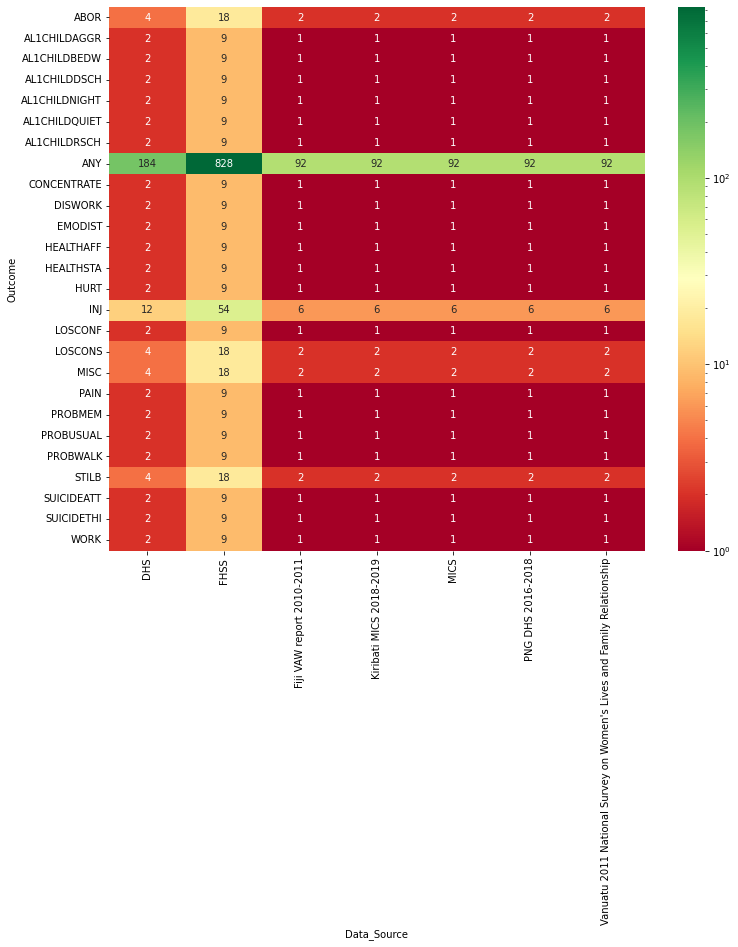

In [13]:
# Create a cross-tabulation between the 'Outcome' and '???????' columns
myCrosstable = pd.crosstab(data_v2['Outcome'], data_v2['Data_Source']) # Change the column name to examine

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(12,10))

# Plot a heatmap using the cross-tabulation data and specify various parameters
sns.heatmap(myCrosstable,
            # Show annotated values in the cells
            annot=True,
            # Normalize the values using a logarithmic scale
            norm=LogNorm(),
            # Use the 'RdYlGn' color map
            cmap='RdYlGn',
            # Format the annotated values as integers
            fmt='d')

Taking some notes

|    Features   | My Notes
|      :---     | :---
|  Country_Code | Seems Ok.
|     Topic     | Very Bad, Outcome==any and Outcome != Any have no common categories. Or fix with comments or drop.
|      Age      | One Categorie, but with comments can make more.
|   Condition   | Seems preety good (If i can make it better with comment, umso besser).
| Violence_Type | Very Bad, I dont think I can fix It... try with comments.
|  Perpetrator  | Preety bad.
|   Actuality   | Could work...
|  Life_Period  | Baaaad again.
|    Response   | Reealy Bad, can't be saved all valuse belong to either Response==Any or Outcome==Any.
|  Help_Reason  | Same with 'Response'.
| Help_Provider | Same with 'Response'.
|  Data_Source  | Seems good (hope ther is some important information).
|    Comment    | Hope to use and save some features.

#### Feature: "Comment"

Due to the accumulation of data in certain values of the target feature, I aim to gather more relevant information from the features by leveraging the raw text in the feature comment. This may help to enhance the weaker values of the target feature and provide additional insights. By utilizing this information, I hope to improve the accuracy and reliability of the results.

In [14]:
# Check for significant key-words or key-phrases
data_v2['Comment'].value_counts()

Women 15-49.                                                                                                     370
Women age 18-64 years.                                                                                           126
Sample women 15-49.                                                                                              125
UN Women: Global database on Violence against women.                                                             124
Sample women aged 15-49.                                                                                         123
Ever married women 15-49.                                                                                        121
Violence committed by husband or anyone else.                                                                      5
Ever married women 15-49. Violence experienced committed by a husband or anyone else.                              2
Sample women aged 15-49. Women 15-49 years experiencing physical

In [15]:
# Defining dictioneries with the important key-words and key-phrases
age = {'15-49':['15-49'],
       '18-64':['18-64']}

condition = {'Ever married' :['EVPART'],
             'Ever-married' :['EVPART'],
             'ever pregnant':['EVPREG'],
             'last child was less than 5 years old':['EVPREG', 'CHI614']}
            
perpetrator = {'husband'         :['PARTNER'],
               'partner'         :['PARTNER'],
               'Husband'         :['PARTNER'],
               'anyone else'     :['ANY'],
               'any perpetrators':['ANY']}
              
violence_type = {'physical or sexual violence'            :['PHYSORSEX'],
                 'taken earnings/savings against her will':['CONT_ECON']} 
                
                
outcome = {'Concentration problems':['CONCENTRATE'],
           'Pain or discomfort'    :['PAIN'],
           'Mobility problem'      :['PROBWALK', 'PROBUSUAL']}
          
life_per = {'In the past four weeks':['SINCE15']} # if vaw['Age'] == '18-64'

topic = {'physical or sexual violence'               :['VAW_003', 'VAW_004'], # if vaw['Perpetrator']' == 'PARTNER'
         'husband'                                   :['VAW_001'], 
         'partner'                                   :['VAW_001'],
         'anyone else'                               :['VAW_007'],
         'Violence experienced from any perpetrators':['VAW_007'],
         'physical or sexual violence'               :['VAW_008', 'VAW_009'], # if vaw['Perpetrator']' != 'PARTNER' & != 'ANY'
         'Pain or discomfort'                        :['VAW_012'],
         'Mobility problem'                          :['VAW_012'],
         'taken earnings/savings against her will'   :['VAW_001']}

In [16]:
# Coloumns that could be not edit by comments and therfore they will be dropped
columns_to_drop = ['Response', 'Help_Reason', 'Help_Provider']

# Drop the specified columns from the data_v2 dataframe
data_v2 = data_v2.drop(columns_to_drop, 
                       # Specify that the columns are being dropped from the dataframe axis
                       axis=1)

<a id="Encodings"></a>
## Encodings

In this section, I perform encoding for all non-encoded features. Encoding is an important step in preprocessing because many machine learning algorithms can only work with numerical data. Non-numerical features, such as categorical data or text data, need to be transformed into numerical data in order to be used in these algorithms. Additionally, encoding helps to reduce the dimensionality of the data by converting categorical variables with many levels into multiple binary variables. This results in a more manageable and interpretable dataset for analysis and modeling.

#### Greate new columns for Age (Ajustments later)

In [17]:
# Determine the number of columns in the data_v2 dataframe
col_loc = data_v2.shape[1]

# Create new columns with the specified age ranges and insert them at the end of the dataframe
for column in ['Age_15-49', 'Age_18-64', 'Age_15-64']:
    # Insert the new column at the specified location with a default value of 0
    data_v2.insert(col_loc, f'{column}', 0, True)

# Set the value of the 'Age_15-64' column to 1 for all rows
data_v2['Age_15-64'] = 1
        
# Drop the original 'Age' column from the data_v2 dataframe
data_v2 = data_v2.drop('Age', 
                       # Specify that the column is being dropped from the dataframe axis
                       axis=1)

#### One hot Encoding for categorical columns

In [18]:
# Encode categorical columns using one-hot encoding
columns = ['Country_Code', 'Topic', 'Condition', 'Violence_Type', 'Perpetrator', 'Actuality', 'Life_Period', 'Data_Source']
prefix  = ['Country', 'Topic', 'Cndtn', 'Vio_typ', 'Prptr', 'Actual', 'L_Per', 'D_S']

# Loop through each column to encode
for idx, column in enumerate(columns):
    # Get the one-hot encoded columns for the current column
    dummies = pd.get_dummies(data_v2[column], prefix=prefix[idx])
    # Concatenate the original data with the one-hot encoded columns
    data_v2 = pd.concat([data_v2, dummies], axis=1)
    # Drop the original column
    data_v2 = data_v2.drop(column, axis=1)

In [19]:
data_v2.head(10) # Seems ok

,Time,Outcome,Observation_Value,Comment,Age_15-64,Age_18-64,Age_15-49,Country_CK,Country_FJ,Country_FM,Country_KI,Country_MH,Country_NR,Country_PG,Country_PW,Country_SB,Country_TO,Country_TV,Country_VU,Country_WS,Topic_VAW_001,Topic_VAW_002,Topic_VAW_003,Topic_VAW_004,Topic_VAW_005,Topic_VAW_006,Topic_VAW_007,Topic_VAW_008,Topic_VAW_009,Topic_VAW_010,Topic_VAW_011,Topic_VAW_012,Topic_VAW_013,Topic_VAW_014,Topic_VAW_015,Topic_VAW_016,Topic_VAW_017,Topic_VAW_018,Cndtn_ANY,Cndtn_CHI614,Cndtn_EVPART,Cndtn_EVPREG,Cndtn_W4M,Vio_typ_ANY,Vio_typ_CONT_ECON,Vio_typ_CONT_FRIENDS,Vio_typ_CONT_OTHMAN,Vio_typ_CONT_UNFAITH,Vio_typ_CONT_WHERE,Vio_typ_EMO,Vio_typ_EMO_HUM,Vio_typ_EMO_INS,Vio_typ_EMO_SCA,Vio_typ_PHYS,Vio_typ_PHYSORSEX,Vio_typ_PHYS_CHOK,Vio_typ_PHYS_FIST,Vio_typ_PHYS_KICK,Vio_typ_PHYS_MOD,Vio_typ_PHYS_PUSH,Vio_typ_PHYS_SEV,Vio_typ_PHYS_SLAP,Vio_typ_PHYS_WEAP,Vio_typ_SEX,Vio_typ_SEX_AFRAID,Vio_typ_SEX_CHILD,Vio_typ_SEX_DEGRAD,Vio_typ_SEX_FORCE,Prptr_ANY,Prptr_FAMFEM,Prptr_FAMMAL,Prptr_NONPART,Prptr_OTHFEM,Prptr_OTHMAL,Prptr_PARTNER,Actual_ALO12M,Actual_ALOLIFE,Actual_ANY,L_Per_ANY,L_Per_BEFORE15,L_Per_PREGNANCY,L_Per_SINCE15,D_S_DHS,D_S_FHSS,D_S_Fiji VAW report 2010-2011,D_S_Kiribati MICS 2018-2019,D_S_MICS,D_S_PNG DHS 2016-2018,D_S_Vanuatu 2011 National Survey on Women's Lives and Family Relationship
0,2013,ANY,6.2,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0
1,2013,ANY,9.6,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,2013,ANY,26.7,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3,2013,ANY,6.7,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,2013,ANY,30.2,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
5,2013,ANY,9.1,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
6,2013,ANY,33.0,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
7,2013,ANY,4.6,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
8,2013,ANY,13.1,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
9,2013,ANY,8.0,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


#### Fill columns by feature "Comment"

In [20]:
# Defining dictioneries with the important key-words and key-phrases
age = {'15-49':['15-49'],
       '18-64':['18-64']}

condition = {'Ever married' :['EVPART'],
             'Ever-married' :['EVPART'],
             'ever pregnant':['EVPREG'],
             'last child was less than 5 years old':['EVPREG', 'CHI614']}
            
perpetrator = {'husband'         :['PARTNER'],
               'partner'         :['PARTNER'],
               'Husband'         :['PARTNER'],
               'anyone else'     :['ANY'],
               'any perpetrators':['ANY']}
              
violence_type = {'physical or sexual violence'            :['PHYSORSEX'],
                 'taken earnings/savings against her will':['CONT_ECON']} 
                
                
outcome = {'Concentration problems':['CONCENTRATE'],
           'Pain or discomfort'    :['PAIN'],
           'Mobility problem'      :['PROBWALK', 'PROBUSUAL']}
          
life_per = {'In the past four weeks':['SINCE15']} # if vaw_encoded['Age'] == '18-64'

topic = {'physical or sexual violence':{'partnr'  :['VAW_003', 'VAW_004'],  # if vaw_encoded['Perpetrator']' == 'PARTNER'
                                        'n-partnr':['VAW_008', 'VAW_009']}, # if vaw_encoded['Perpetrator']' != 'PARTNER' & != 'ANY'
         'husband'                                   :['VAW_001'], 
         'partner'                                   :['VAW_001'],
         'anyone else'                               :['VAW_007'],
         'Violence experienced from any perpetrators':['VAW_007'],
         'Pain or discomfort'                        :['VAW_012'],
         'Mobility problem'                          :['VAW_012'],
         'taken earnings/savings against her will'   :['VAW_001']}

#### Fill columns by feature "Comment"

In [21]:
import warnings
warnings.filterwarnings('ignore')

# Fill the condition, perpetrator, and violence type columns based on the keyword
rows = data_v2.shape[0]

def fill_cols(col_dict, prefix):
    # Loop through all the rows of the dataframe
    for row in range(rows):
        # Check if there is a comment in the current row
        if str(data_v2['Comment'].iloc[row]) != 'nan':
            # Loop through all the keywords in the provided dictionary
            for keyword in col_dict:
                # Check if the keyword exists in the current comment
                if keyword in data_v2['Comment'].iloc[row]:
                    # Flag to keep track if any keyword was found in the comment
                    change_any = True
                    # Loop through the columns associated with the keyword
                    for col in col_dict[keyword]:
                            # Set the value of the column to 1
                            data_v2[f'{prefix}_{col}'].iloc[row] = 1      
                            # If the keyword is 'ANY', the change_any flag is set to False
                            if col == 'ANY':
                                change_any = False
                                
                    # If no keyword was found, the value of the 'prefix_ANY' column is set to 0
                    if change_any:
                        data_v2[f'{prefix}_ANY'].iloc[row] = 0
                    
# Fill the columns associated with condition
fill_cols(condition, 'Cndtn')
# Fill the columns associated with perpetrator
fill_cols(perpetrator, 'Prptr')
# Fill the columns associated with violence type
fill_cols(violence_type, 'Vio_typ')

#### Filling feature: "Age"

In [22]:
import warnings
warnings.filterwarnings('ignore')

# Number of rows in the data
rows = data_v2.shape[0]

# Loop through each row
for row in range(rows):
    # Loop through each key_word in 'age' dictionary
    for key_word in age:
        # Check if there is a comment in the row
        if str(data_v2['Comment'].iloc[row]) != 'nan':
            # Check if the key_word exists in the comment
            if key_word in data_v2['Comment'].iloc[row]: 
                # If key_word exists, set the corresponding age column to 1
                data_v2[f'Age_{age[key_word][0]}'].iloc[row] = 1
                # Set the 'Age_15-64' column to 0 as only one age category can be assigned per row
                data_v2['Age_15-64'].iloc[row] = 0


#### Filling feature: "Period of Life"

In [23]:
# Number of rows in the data
rows = data_v2.shape[0]

# Loop through each row in the data_v2 dataframe
for row in range(rows):
    # Check if there is an available comment in the current row
    if str(data_v2['Comment'].iloc[row]) != 'nan':
        # Loop through each keyword in the life_per dictionary
        for keyword in life_per:
            # Check if the keyword exists in the comment and the age of the individual is between 18 and 64
            if keyword in data_v2['Comment'].iloc[row] and data_v2['Age_18-64'].iloc[row] == 1: 
                # Mark the life period corresponding to the keyword as 1
                data_v2[f'L_Per_{life_per[keyword][0]}'].iloc[row] = 1
                # Mark the "ANY" column as 0 to indicate that the life period has been identified
                data_v2['L_Per_ANY'].iloc[row] = 0

#### Filling feature: "Perpetrator"

In [24]:
import warnings
warnings.filterwarnings('ignore')

# Iterate through rows
for row in range(rows):
    # Check if there is an available comment in this row
    if str(data_v2['Comment'].iloc[row]) != 'nan':
        # Iterate through keywords
        for keyword in topic:
            go_on = True
            # Check if the keyword exists in the comment
            if keyword in data_v2['Comment'].iloc[row]:
                if keyword == 'physical or sexual violence':
                    # Check if the perpetrator is a partner
                    if data_v2['Prptr_PARTNER'].iloc[row] == 1:
                        cols_dict = topic[keyword]['partnr']
                    # Check if the perpetrator is not a partner and any of the perpetrators is not mentioned
                    elif data_v2['Prptr_PARTNER'].iloc[row] != 1 and data_v2['Prptr_ANY'].iloc[row] != 1:
                        cols_dict = topic[keyword]['n-partnr']
                    else:
                        # If the perpetrator is not specified, go to the next keyword
                        go_on = False
                else:
                    cols_dict = topic[keyword]
                # Iterate through columns to be adjusted
                if go_on:
                    for col in cols_dict:
                        # Mark the column as 1 in the corresponding row
                        data_v2[f'Topic_{col}'].iloc[row] = 1

In [25]:
data_v2.head(10)

,Time,Outcome,Observation_Value,Comment,Age_15-64,Age_18-64,Age_15-49,Country_CK,Country_FJ,Country_FM,Country_KI,Country_MH,Country_NR,Country_PG,Country_PW,Country_SB,Country_TO,Country_TV,Country_VU,Country_WS,Topic_VAW_001,Topic_VAW_002,Topic_VAW_003,Topic_VAW_004,Topic_VAW_005,Topic_VAW_006,Topic_VAW_007,Topic_VAW_008,Topic_VAW_009,Topic_VAW_010,Topic_VAW_011,Topic_VAW_012,Topic_VAW_013,Topic_VAW_014,Topic_VAW_015,Topic_VAW_016,Topic_VAW_017,Topic_VAW_018,Cndtn_ANY,Cndtn_CHI614,Cndtn_EVPART,Cndtn_EVPREG,Cndtn_W4M,Vio_typ_ANY,Vio_typ_CONT_ECON,Vio_typ_CONT_FRIENDS,Vio_typ_CONT_OTHMAN,Vio_typ_CONT_UNFAITH,Vio_typ_CONT_WHERE,Vio_typ_EMO,Vio_typ_EMO_HUM,Vio_typ_EMO_INS,Vio_typ_EMO_SCA,Vio_typ_PHYS,Vio_typ_PHYSORSEX,Vio_typ_PHYS_CHOK,Vio_typ_PHYS_FIST,Vio_typ_PHYS_KICK,Vio_typ_PHYS_MOD,Vio_typ_PHYS_PUSH,Vio_typ_PHYS_SEV,Vio_typ_PHYS_SLAP,Vio_typ_PHYS_WEAP,Vio_typ_SEX,Vio_typ_SEX_AFRAID,Vio_typ_SEX_CHILD,Vio_typ_SEX_DEGRAD,Vio_typ_SEX_FORCE,Prptr_ANY,Prptr_FAMFEM,Prptr_FAMMAL,Prptr_NONPART,Prptr_OTHFEM,Prptr_OTHMAL,Prptr_PARTNER,Actual_ALO12M,Actual_ALOLIFE,Actual_ANY,L_Per_ANY,L_Per_BEFORE15,L_Per_PREGNANCY,L_Per_SINCE15,D_S_DHS,D_S_FHSS,D_S_Fiji VAW report 2010-2011,D_S_Kiribati MICS 2018-2019,D_S_MICS,D_S_PNG DHS 2016-2018,D_S_Vanuatu 2011 National Survey on Women's Lives and Family Relationship
0,2013,ANY,6.2,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0
1,2013,ANY,9.6,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,2013,ANY,26.7,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3,2013,ANY,6.7,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,2013,ANY,30.2,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
5,2013,ANY,9.1,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
6,2013,ANY,33.0,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
7,2013,ANY,4.6,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
8,2013,ANY,13.1,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
9,2013,ANY,8.0,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


#### Check if the comments did realy helped (hint almost nothing new...)

In [26]:
# New (encoded columns)
age_cols = ['Age_15-64', 'Age_18-64', 'Age_15-49']

coutry_cols = ['Country_CK','Country_FJ','Country_FM','Country_KI',
               'Country_MH','Country_NR','Country_PG','Country_PW',
               'Country_SB','Country_TO','Country_TV','Country_VU',
               'Country_WS']

topic_cols = ['Topic_VAW_001','Topic_VAW_002','Topic_VAW_003','Topic_VAW_004',
              'Topic_VAW_005','Topic_VAW_006','Topic_VAW_007','Topic_VAW_008',
              'Topic_VAW_009','Topic_VAW_010','Topic_VAW_011','Topic_VAW_012',
              'Topic_VAW_013','Topic_VAW_014','Topic_VAW_015','Topic_VAW_016',
              'Topic_VAW_017','Topic_VAW_018']

condition_cols = ['Cndtn_ANY','Cndtn_CHI614','Cndtn_EVPART',
                  'Cndtn_EVPREG','Cndtn_W4M']

violence_type_cols = ['Vio_typ_ANY','Vio_typ_CONT_ECON','Vio_typ_CONT_FRIENDS',
                      'Vio_typ_CONT_OTHMAN','Vio_typ_CONT_UNFAITH','Vio_typ_CONT_WHERE',
                      'Vio_typ_EMO','Vio_typ_EMO_HUM','Vio_typ_EMO_INS','Vio_typ_EMO_SCA',
                      'Vio_typ_PHYS','Vio_typ_PHYSORSEX','Vio_typ_PHYS_CHOK',
                      'Vio_typ_PHYS_FIST','Vio_typ_PHYS_KICK','Vio_typ_PHYS_MOD',
                      'Vio_typ_PHYS_PUSH','Vio_typ_PHYS_SEV','Vio_typ_PHYS_SLAP',
                      'Vio_typ_PHYS_WEAP','Vio_typ_SEX','Vio_typ_SEX_AFRAID',
                      'Vio_typ_SEX_CHILD','Vio_typ_SEX_DEGRAD','Vio_typ_SEX_FORCE']

perpetrator_cols = ['Prptr_ANY','Prptr_FAMFEM','Prptr_FAMMAL','Prptr_NONPART',
                    'Prptr_OTHFEM','Prptr_OTHMAL','Prptr_PARTNER']

actuality_cols = ['Actual_ALO12M','Actual_ALOLIFE','Actual_ANY']

life_period_cols = ['L_Per_ANY','L_Per_BEFORE15','L_Per_PREGNANCY','L_Per_SINCE15']

data_source_cols = ['D_S_DHS','D_S_FHSS','D_S_Fiji VAW report 2010-2011',
                    'D_S_Kiribati MICS 2018-2019','D_S_MICS','D_S_PNG DHS 2016-2018',
                    "D_S_Vanuatu 2011 National Survey on Women's Lives and Family Relationship"]

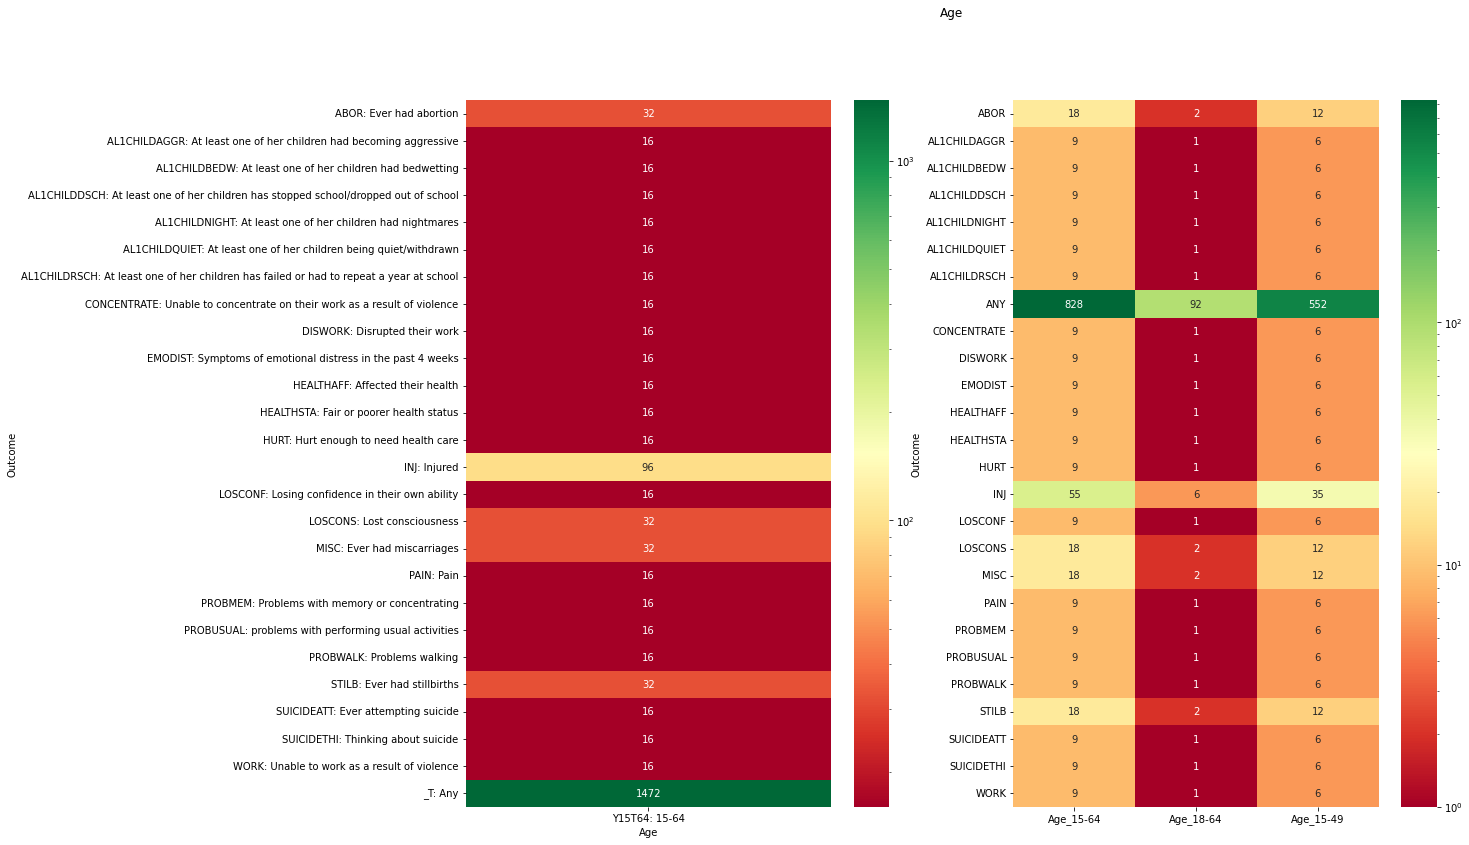

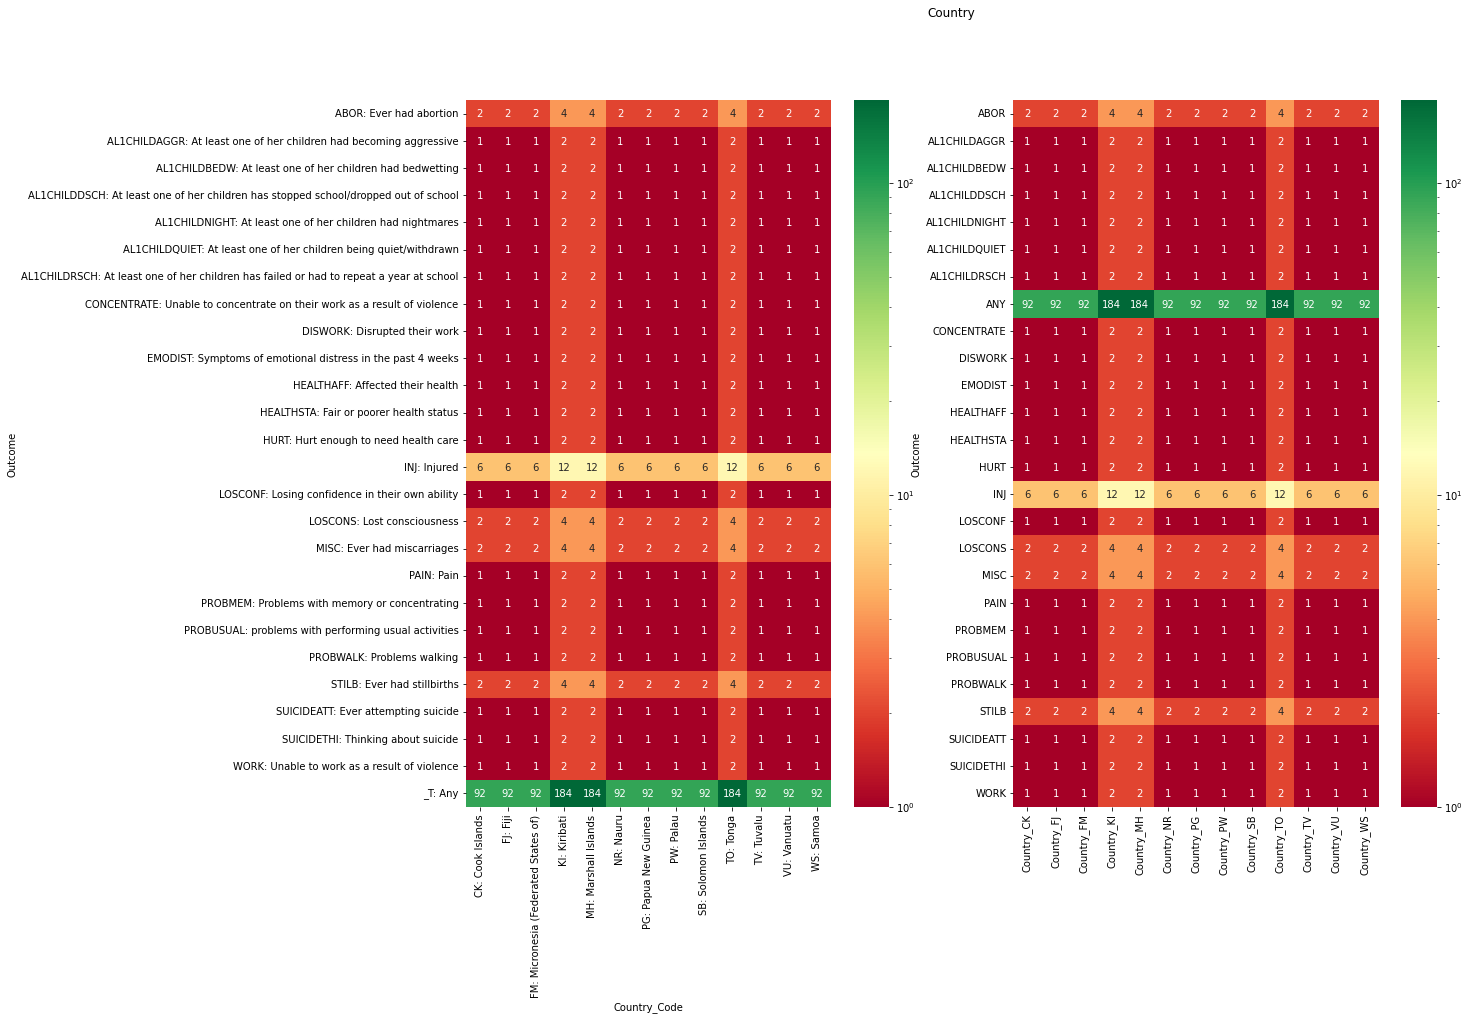

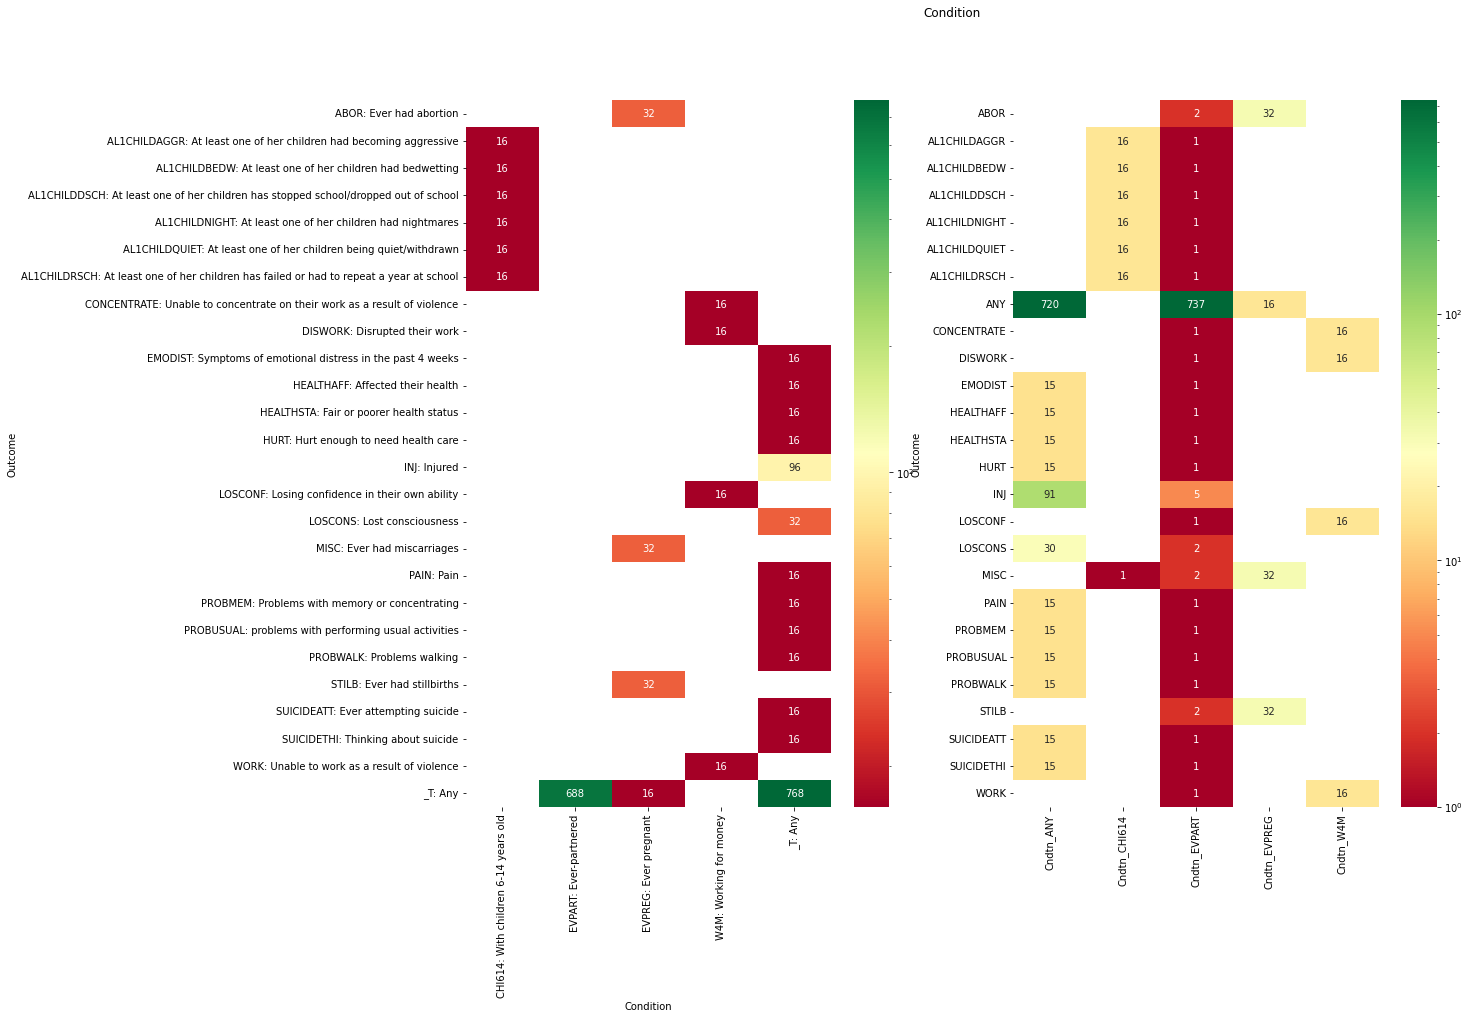

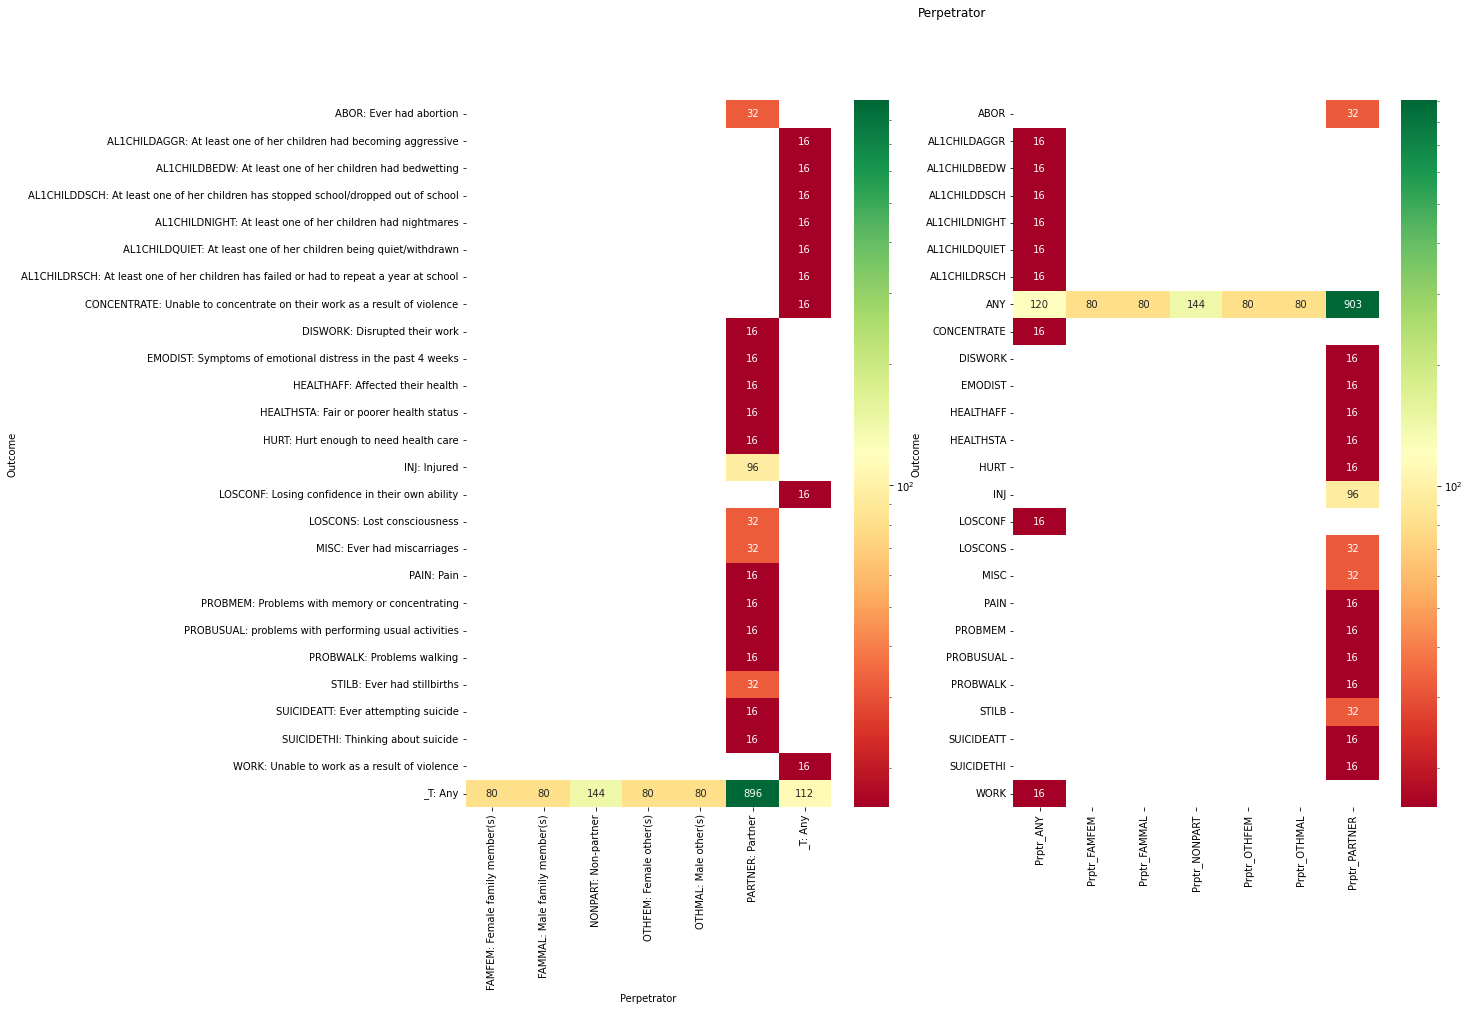

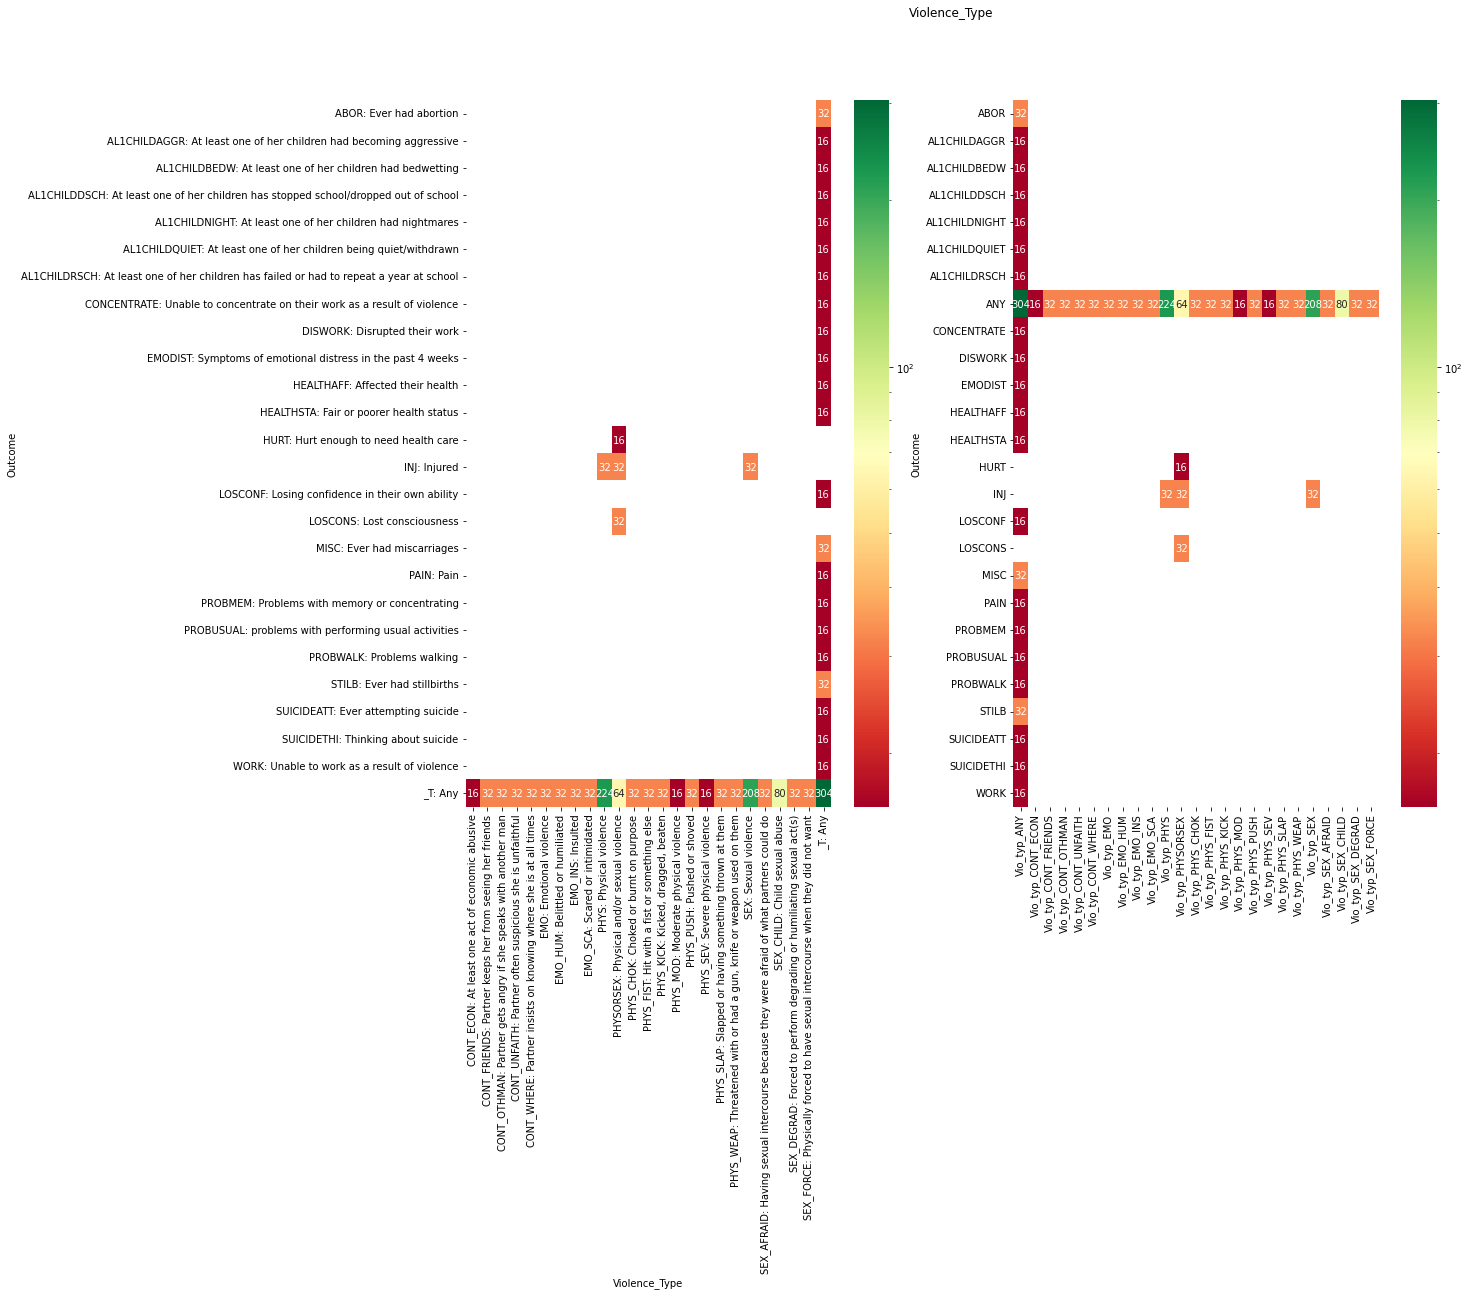

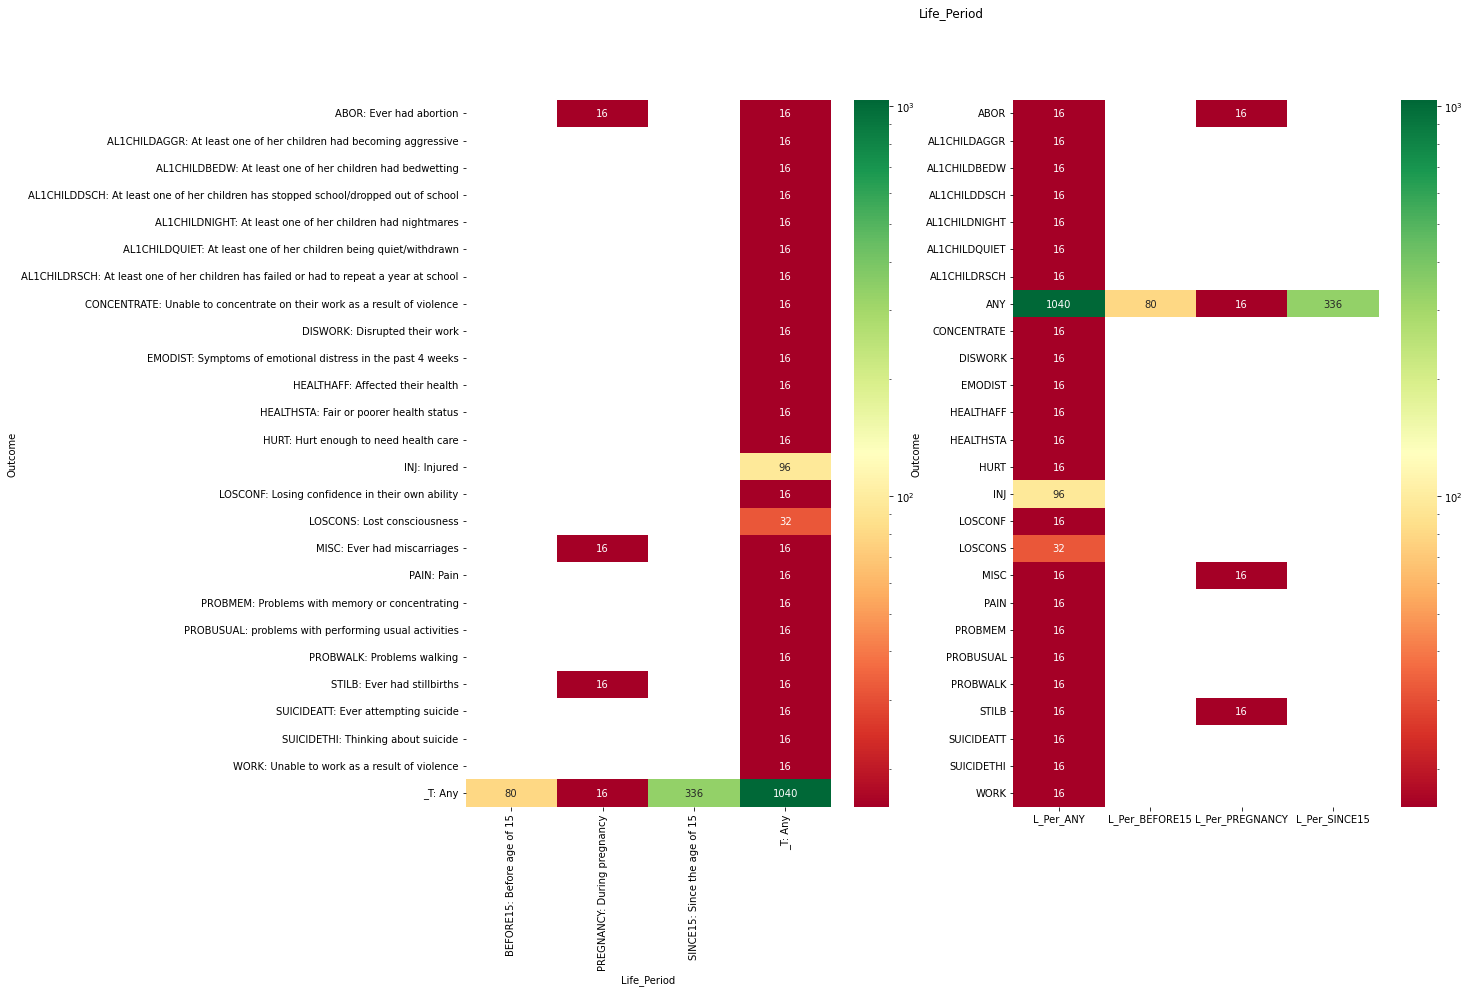

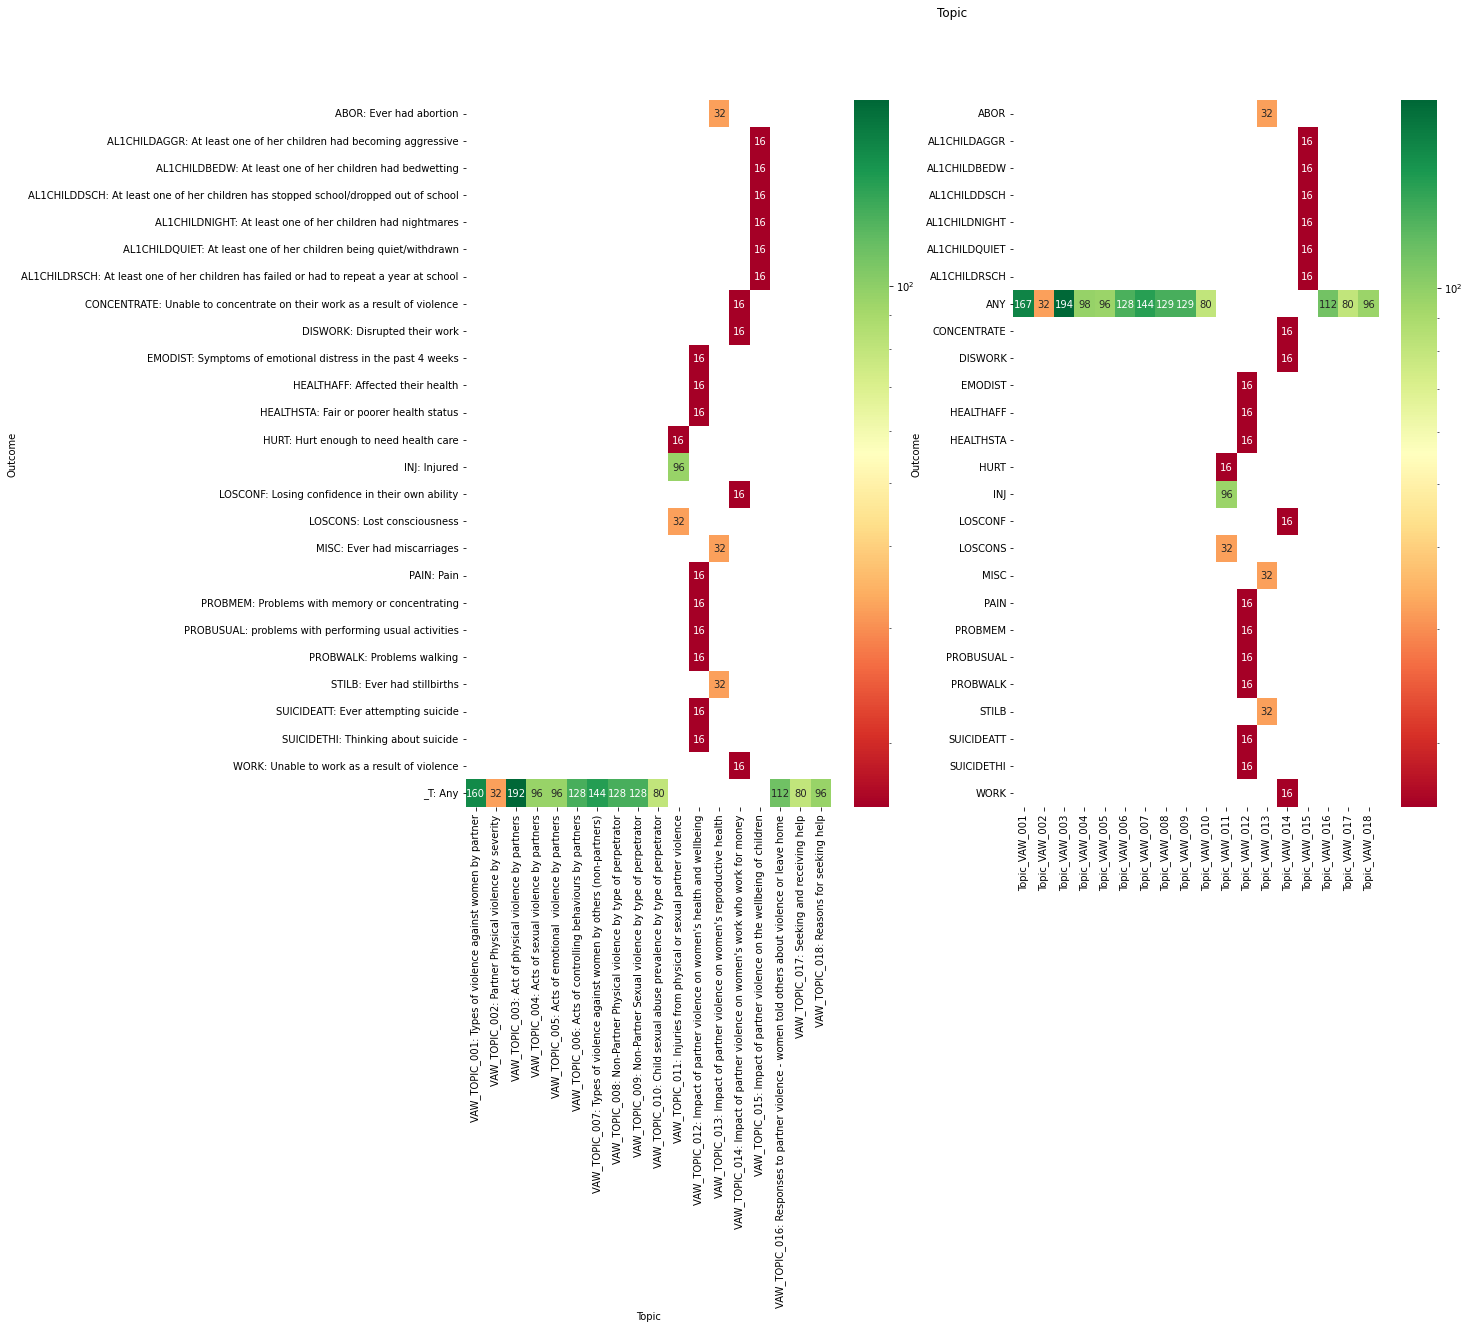

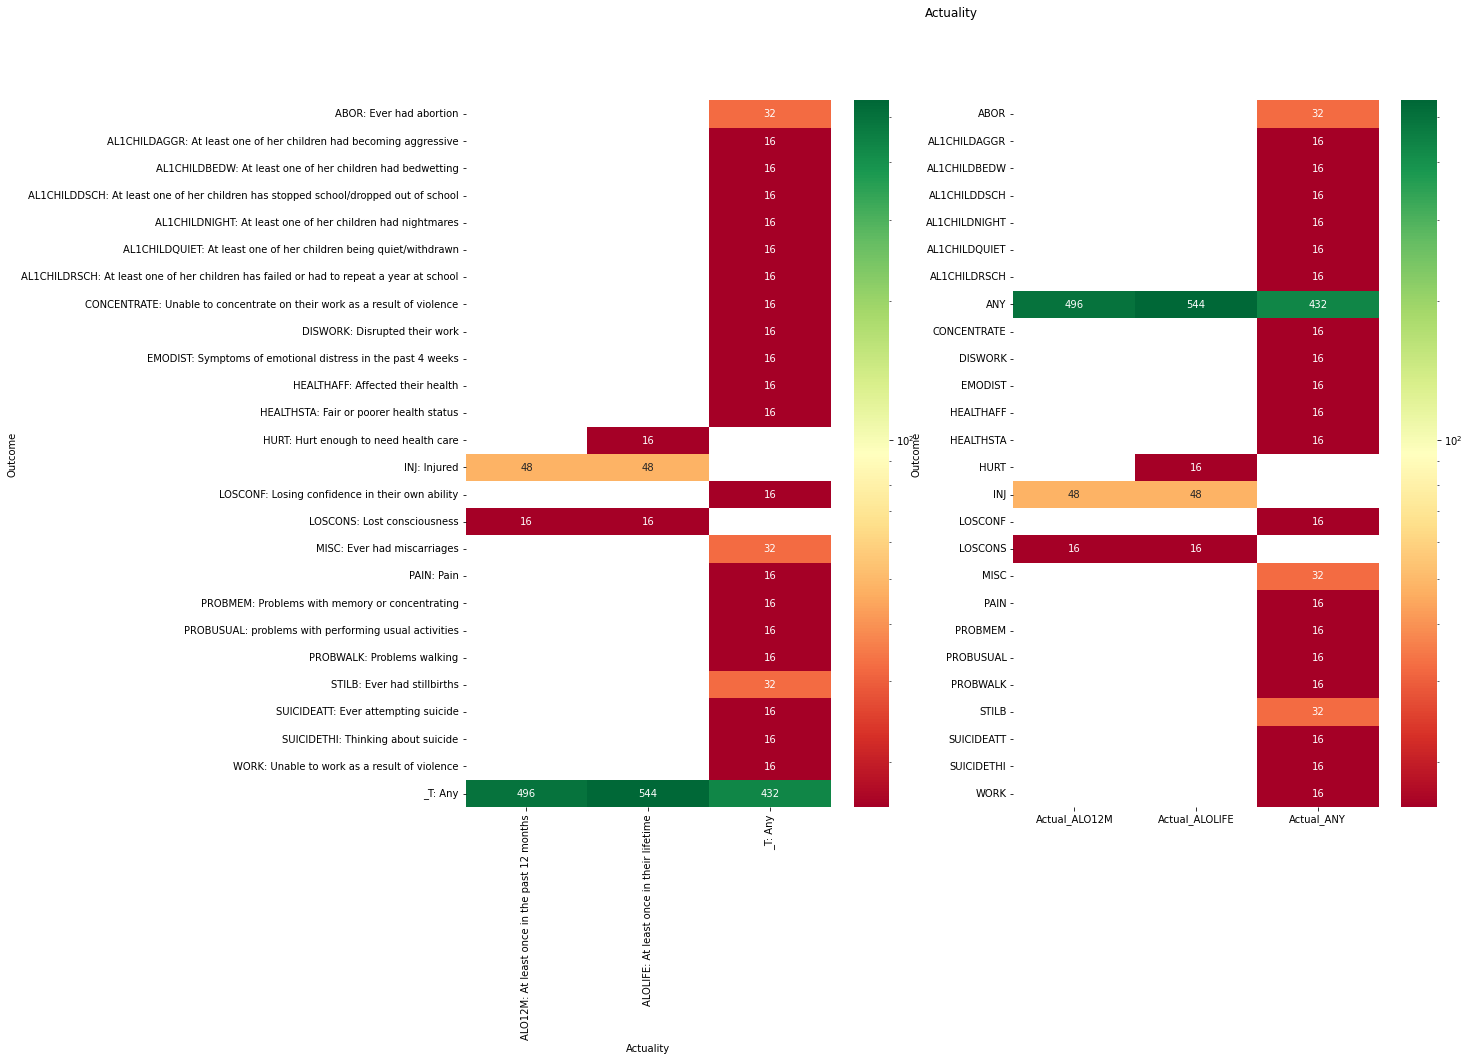

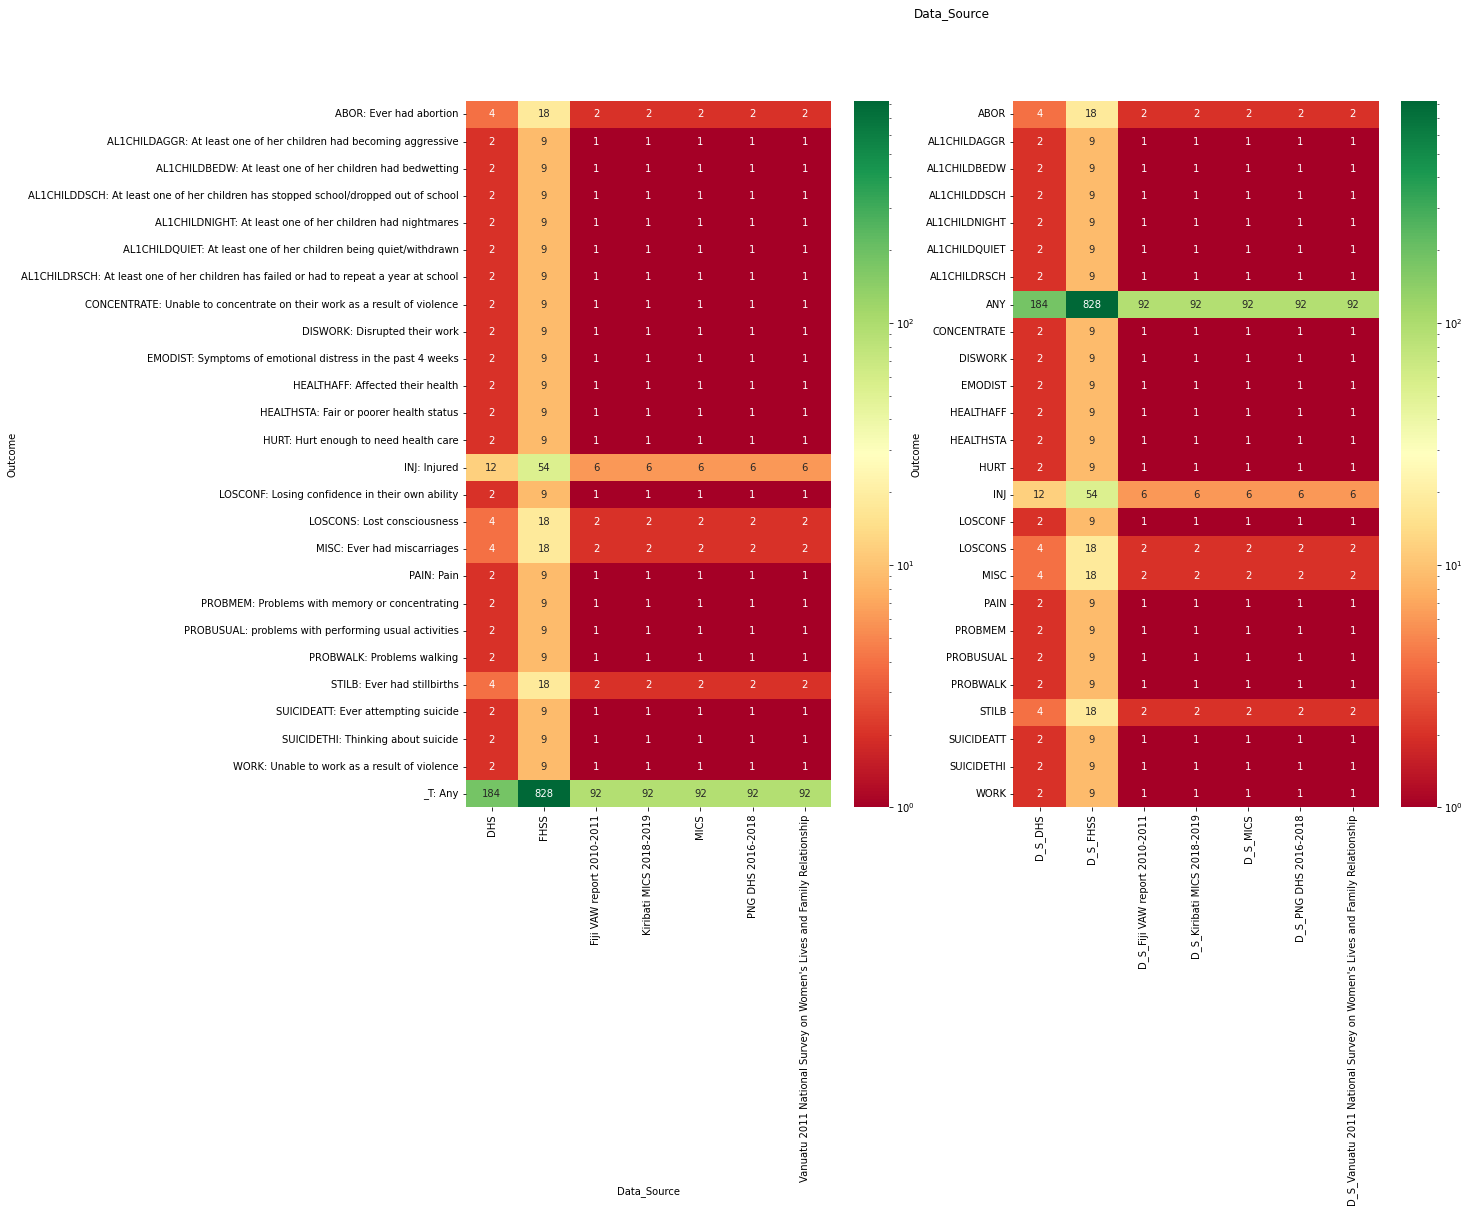

In [28]:
old_cols   = ['Age','Country_Code','Condition','Perpetrator','Violence_Type','Life_Period','Topic',
              'Actuality','Data_Source']
encod_cols = [age_cols, coutry_cols, condition_cols, perpetrator_cols,violence_type_cols,
              life_period_cols, topic_cols,actuality_cols, data_source_cols]
titles     = ['Age', 'Country', 'Condition','Perpetrator','Violence_Type','Life_Period','Topic',
              'Actuality','Data_Source']

# Loop through the different columns to compare the frequency count between old columns and new columns
for idx in range(len(encod_cols)):
    # Get the cross-tabulation matrix of the old column and outcome
    tab1 = pd.crosstab(data_v1['Outcome'], data_v1[old_cols[idx]])
    # Get the frequency count of the new columns by grouping the data_v2 by Outcome
    tab2 = data_v2.groupby(['Outcome'])[encod_cols[idx]].sum()
    # Compare the two tables with side-by-side heatmaps
    heatmaps_side_by_side(tab1, tab2, titles[idx], 'RdYlGn')

#### Encode feature: "Outcome"

In [29]:
# This function will convert the string in the Outcome column to integer using the
# outcome_encoder dictionary. The outcome_encoder dictionary maps the string to an integer.
def outcome_encod(string):
    # Look up the string in the outcome_encoder dictionary and return the corresponding integer
    return OUTCOME_ENCODES[string]

# Apply the outcome_encod function to the Outcome column of the data_v2 dataframe
data_v2['Outcome'] = data_v2['Outcome'].apply(outcome_encod)

<a id="Remove_Highly_Correlated_Features"></a>
## Remove_Highly_Correlated_Features

In [30]:
# Using Pearson Correlation
# Create figure with specific size
plt.figure(figsize=(18,10))
# Calculate spearman correlation between all columns in data_v2
cor = data_v2.corr(method='spearman')

<Figure size 1296x720 with 0 Axes>

The Pearson correlation matrix is constructed to identify and remove highly correlated features, as they can decrease the model's performance. The correlations are symmetric, so only the lower triangle of the matrix is needed for analysis. Due to the high number of features, the lower triangle was divided into three parts and plotted separately for better visualization, as shown in the picture.<br/>
![Pearson Correlation Matrix](imgs/Pearson_Correletion_Matrix.png)

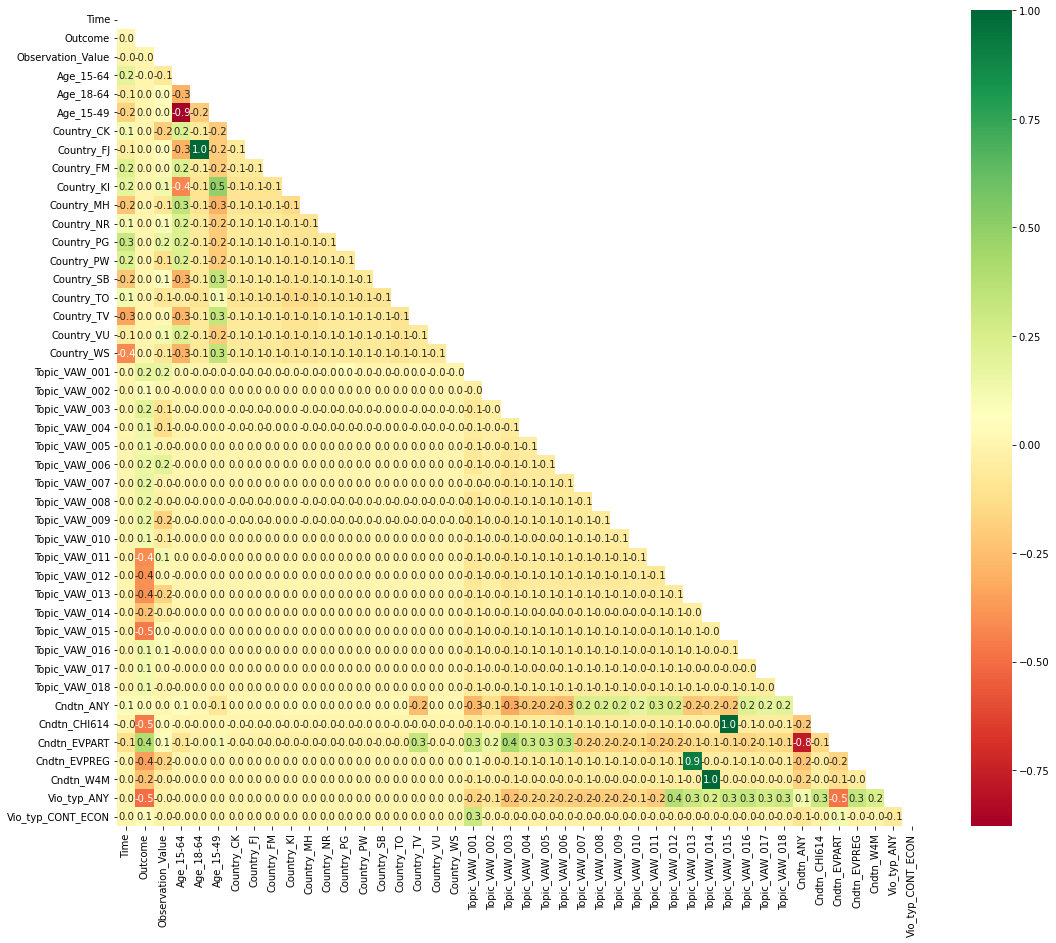

In [31]:
# Plotting the upper right triangle (1) of Pearson Correlation matrix using a heatmap
mid = int(cor.shape[0]/2)
# Selecting the upper right triangle of the correlation matrix
subCor = cor.iloc[0:mid,0:mid]
# Creating a mask to hide the lower triangle of the heatmap
mask = np.zeros_like(subCor)
mask[np.triu_indices_from(mask)] = True
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(18,15))
sns.heatmap(subCor,
            # Apply the mask to hide the lower triangle
            mask=mask,
            # Show the values in each cell
            annot=True,
            # Choose the color map
            cmap='RdYlGn',
            # Display values with 1 decimal place
            fmt=".1f"
           )
# Display the plot
plt.show()

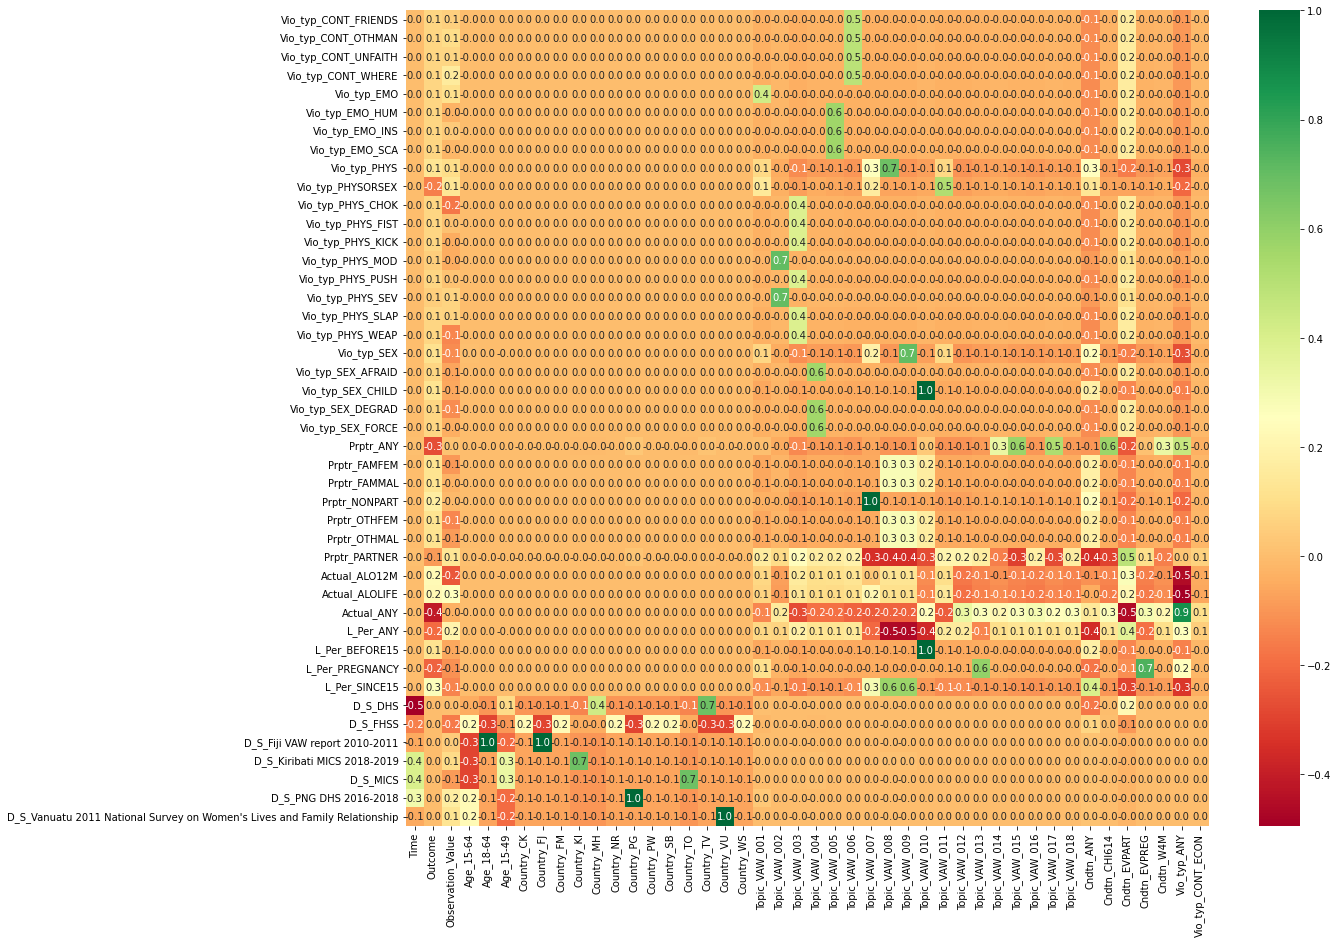

In [32]:
# Plotting the lower right squere (2) of Pearson Correlation matrix using a heatmap
mid = int(cor.shape[0]/2)
# Selecting the lower right squere of the correlation matrix
subCor = cor.iloc[mid:,0:mid]
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(18,15))
sns.heatmap(subCor,
            # Apply the mask to hide the lower triangle
            # mask=mask,
            # Show the values in each cell
            annot=True,
            # Choose the color map
            cmap='RdYlGn',
            # Display values with 1 decimal place
            fmt=".1f"
           )
# Display the plot
plt.show()

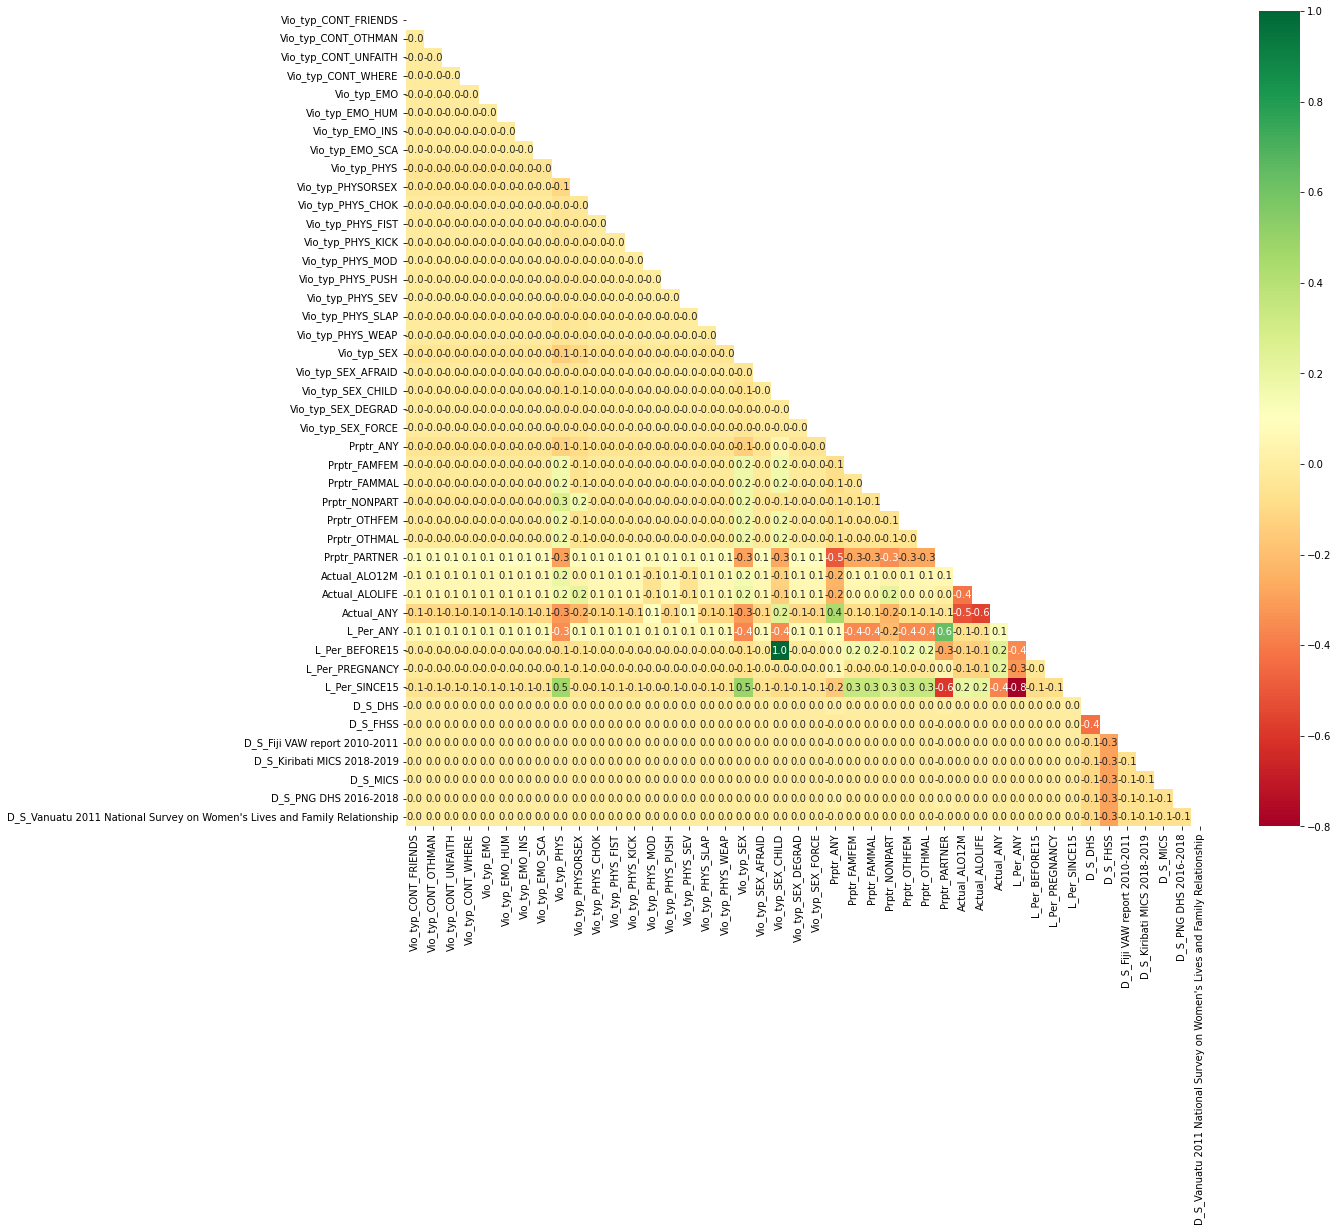

In [33]:
# Plotting the lower left triangle (3) of Pearson Correlation matrix using a heatmap
mid = int(cor.shape[0]/2)
# Selecting the lower left triangle of the correlation matrix
subCor = cor.iloc[mid:,mid:]
# Creating a mask to hide the lower triangle of the heatmap
mask = np.zeros_like(subCor)
mask[np.triu_indices_from(mask)] = True
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(18,15))
sns.heatmap(subCor,
            # Apply the mask to hide the lower triangle
            mask=mask,
            # Show the values in each cell
            annot=True,
            # Choose the color map
            cmap='RdYlGn',
            # Display values with 1 decimal place
            fmt=".1f"
           )
# Display the plot
plt.show()

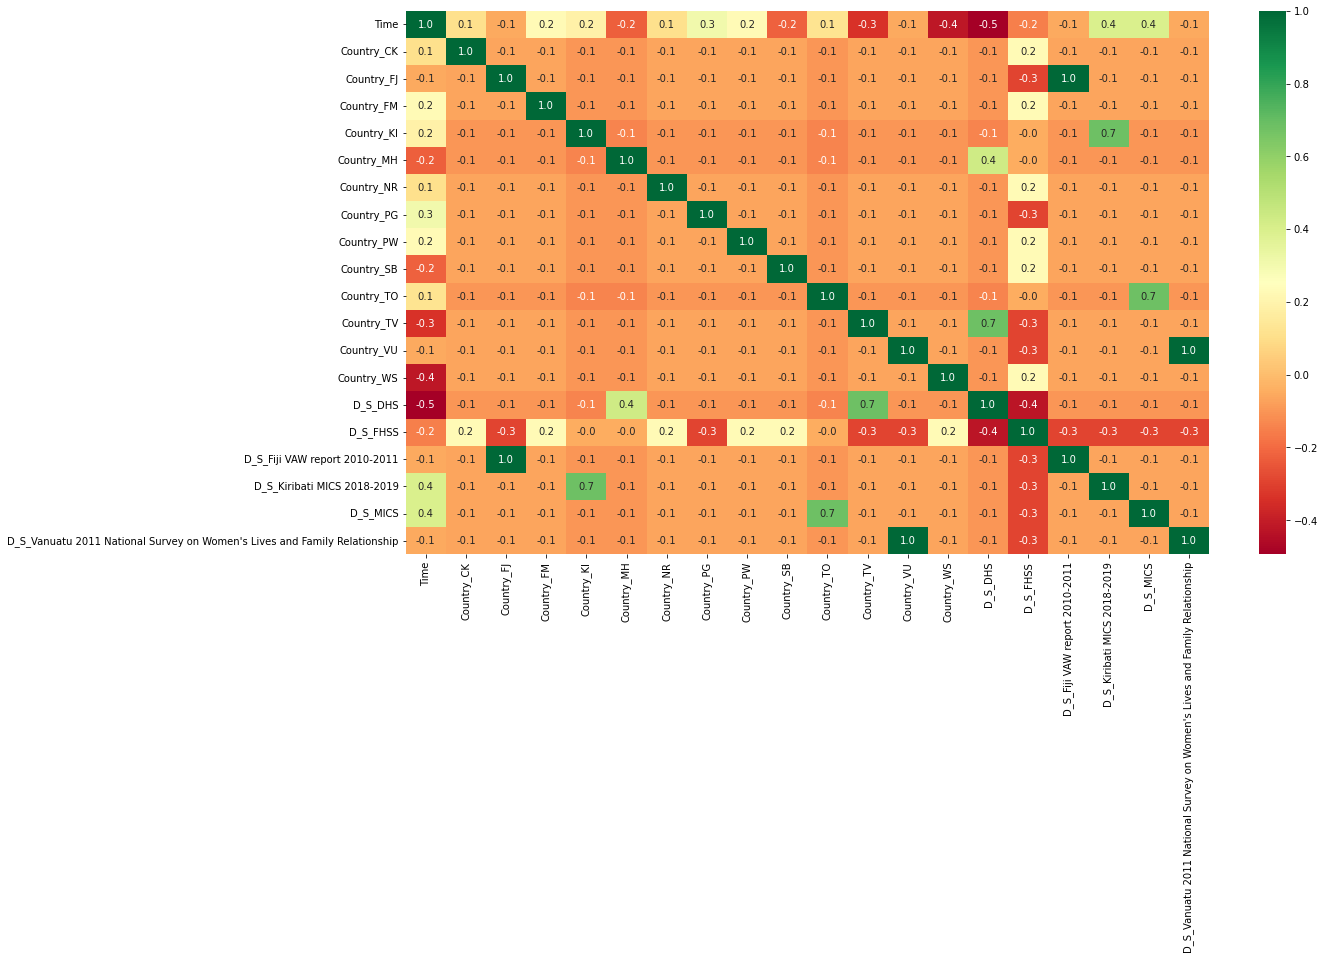

In [34]:
# Take a closer look at some features
cols_to_check = ['Time','Country_CK','Country_FJ','Country_FM','Country_KI',
                 'Country_MH','Country_NR','Country_PG','Country_PW',
                 'Country_SB','Country_TO','Country_TV','Country_VU',
                 'Country_WS','D_S_DHS','D_S_FHSS',
                 'D_S_Fiji VAW report 2010-2011',
                 'D_S_Kiribati MICS 2018-2019','D_S_MICS',
                 "D_S_Vanuatu 2011 National Survey on Women's Lives and Family Relationship"]

# Using Pearson Correlation to check the correlation between the selected columns
plt.figure(figsize=(18,10))
# Calculate the spearman correlation between the selected columns
cor = (data_v2[cols_to_check]).corr(method='spearman')
# Plot the heatmap of the correlation matrix
sns.heatmap(cor,
            # Add the values to each cell
            annot=True,
            # Use the RdYlGn color map
            cmap='RdYlGn',
            # Format the values to 1 decimal place
            fmt=".1f"
           )
# Show the plot
plt.show()

In [35]:
# Drop the columns that have little or no impact on the Outcome
cols_to_drop = ['Age_15-64','Age_18-64','Topic_VAW_007','Topic_VAW_010',
                'Topic_VAW_013','Topic_VAW_014','Topic_VAW_015','Cndtn_ANY','Vio_typ_ANY',
                'Prptr_ANY','Actual_ANY','L_Per_ANY','D_S_DHS','D_S_FHSS',
                'D_S_Fiji VAW report 2010-2011','D_S_Kiribati MICS 2018-2019',
                'D_S_MICS','D_S_PNG DHS 2016-2018',
                "D_S_Vanuatu 2011 National Survey on Women's Lives and Family Relationship",
                'Comment']

# Drop the columns from data_v2 and save the result to data_v3
data_v3 = data_v2.drop(cols_to_drop, axis=1)

In [36]:
print(f'Final number of features is: {data_v3.shape[1]}') # final columns (69 in total)

Final number of features is: 69


In [37]:
data_v3.head(10) # Last look! 

,Time,Outcome,Observation_Value,Age_15-49,Country_CK,Country_FJ,Country_FM,Country_KI,Country_MH,Country_NR,Country_PG,Country_PW,Country_SB,Country_TO,Country_TV,Country_VU,Country_WS,Topic_VAW_001,Topic_VAW_002,Topic_VAW_003,Topic_VAW_004,Topic_VAW_005,Topic_VAW_006,Topic_VAW_008,Topic_VAW_009,Topic_VAW_011,Topic_VAW_012,Topic_VAW_016,Topic_VAW_017,Topic_VAW_018,Cndtn_CHI614,Cndtn_EVPART,Cndtn_EVPREG,Cndtn_W4M,Vio_typ_CONT_ECON,Vio_typ_CONT_FRIENDS,Vio_typ_CONT_OTHMAN,Vio_typ_CONT_UNFAITH,Vio_typ_CONT_WHERE,Vio_typ_EMO,Vio_typ_EMO_HUM,Vio_typ_EMO_INS,Vio_typ_EMO_SCA,Vio_typ_PHYS,Vio_typ_PHYSORSEX,Vio_typ_PHYS_CHOK,Vio_typ_PHYS_FIST,Vio_typ_PHYS_KICK,Vio_typ_PHYS_MOD,Vio_typ_PHYS_PUSH,Vio_typ_PHYS_SEV,Vio_typ_PHYS_SLAP,Vio_typ_PHYS_WEAP,Vio_typ_SEX,Vio_typ_SEX_AFRAID,Vio_typ_SEX_CHILD,Vio_typ_SEX_DEGRAD,Vio_typ_SEX_FORCE,Prptr_FAMFEM,Prptr_FAMMAL,Prptr_NONPART,Prptr_OTHFEM,Prptr_OTHMAL,Prptr_PARTNER,Actual_ALO12M,Actual_ALOLIFE,L_Per_BEFORE15,L_Per_PREGNANCY,L_Per_SINCE15
0,2013,25,6.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2013,25,9.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,2013,25,26.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,2013,25,6.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,2013,25,30.2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
5,2013,25,9.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
6,2013,25,33.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
7,2013,25,4.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
8,2013,25,13.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
9,2013,25,8.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [38]:
# Saving the cleaned data
data_v3.to_csv('datasets/WAV_Preprocessed.csv', index=False)